In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/home/xhding/workspaces/torch-deep-retina')
import os
import scipy
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import pyret
from kinetic.evaluation import *
from kinetic.utils import *
from kinetic.config import get_custom_cfg
from kinetic.data import *
from kinetic.notebook.functions import *
import kinetic.models as models
from kinetic.models import *

In [3]:
with h5py.File('/home/xhding/tem_stim/20-10-30/fullfield_whitenoise.h5', 'r') as f:
    stimulus =  np.asarray(f['test']['stimulus'][:, 25, 25]).astype('float32')
    resp = np.asarray(f['test']['response']['firing_rate_10ms'])

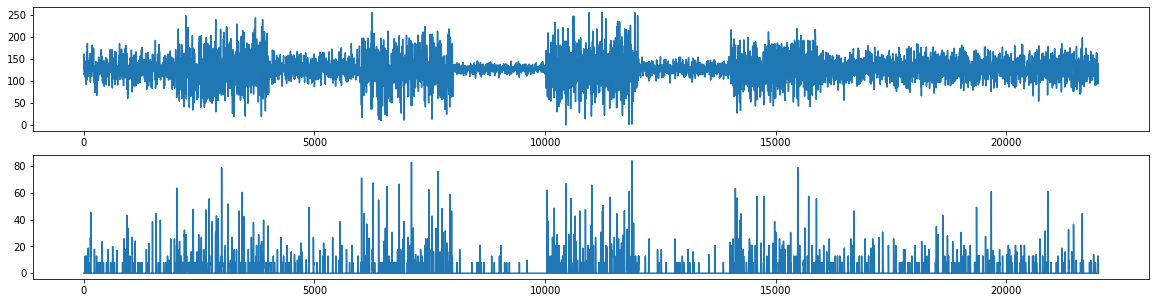

In [11]:
fig,ax = plt.subplots(2,1,figsize=(20,5))
ax[0].plot(stimulus)
ax[1].plot(resp[2])

In [117]:
with h5py.File('/home/xhding/tem_stim/20-12-02/fullfield.h5', 'r') as f:
    stimulus =  np.asarray(f['train']['stimulus'][:, 25, 25]).astype('float32')
    resp = np.asarray(f['train']['response']['firing_rate_10ms'])

In [125]:
stimuli = stimulus[:360540].reshape((90,-1))

In [126]:
responses = np.swapaxes(resp, 0, 1)[:360540].reshape((90, -1, 5))

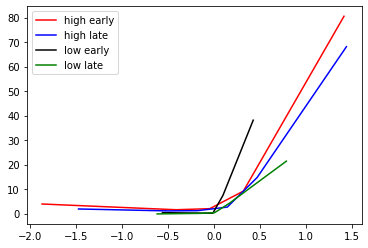

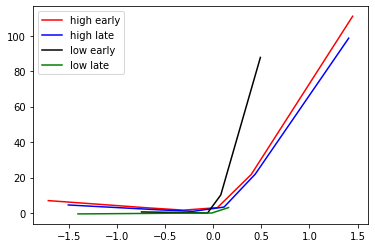

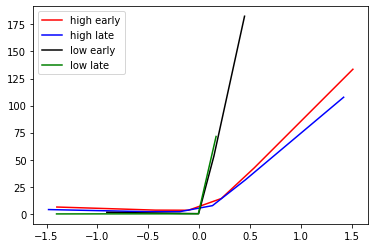

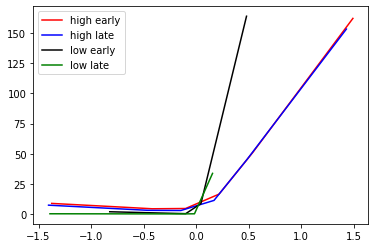

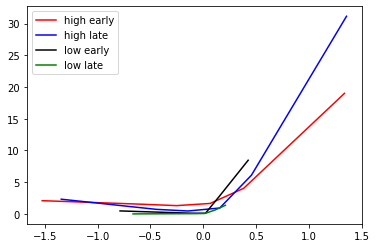

In [130]:
for cell in range(5):
    _, x_he, nonlinear_he = LN_model_multi_trials_fourier(stimuli, responses, 0.35, cell, 0, 500)
    _, x_hl, nonlinear_hl = LN_model_multi_trials_fourier(stimuli, responses, 0.35, cell, 1400, 2000)
    _, x_le, nonlinear_le = LN_model_multi_trials_fourier(stimuli, responses, 0.05, cell, 2000, 2500)
    _, x_ll, nonlinear_ll = LN_model_multi_trials_fourier(stimuli, responses, 0.05, cell, 3400, 4000)
    plt.plot(x_he, nonlinear_he, 'r', label='high early')
    plt.plot(x_hl, nonlinear_hl, 'b', label='high late')
    plt.plot(x_le, nonlinear_le, 'k', label='low early')
    plt.plot(x_ll, nonlinear_ll, 'g', label='low late')
    plt.legend()
    plt.show()

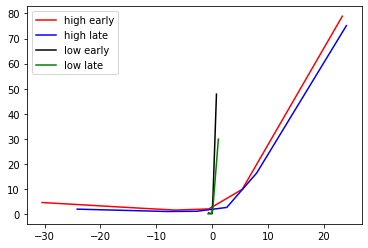

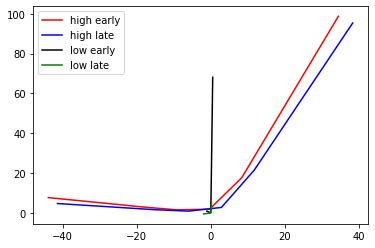

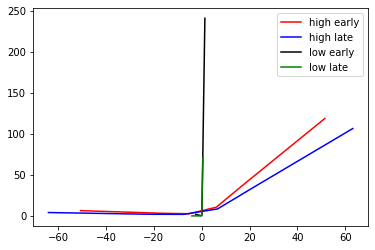

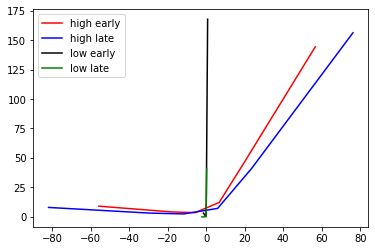

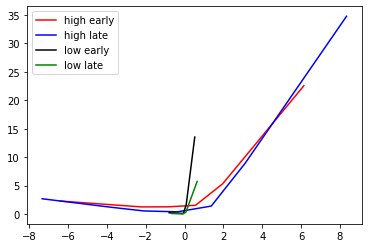

In [131]:
for cell in range(5):
    _, x_he, nonlinear_he = LN_model_multi_trials(stimuli, responses, 0.35, cell, 0, 500, sta_type='revcor')
    _, x_hl, nonlinear_hl = LN_model_multi_trials(stimuli, responses, 0.35, cell, 1400, 2000, sta_type='revcor')
    _, x_le, nonlinear_le = LN_model_multi_trials(stimuli, responses, 0.05, cell, 2000, 2500, sta_type='revcor')
    _, x_ll, nonlinear_ll = LN_model_multi_trials(stimuli, responses, 0.05, cell, 3400, 4000, sta_type='revcor')
    plt.plot(x_he, nonlinear_he, 'r', label='high early')
    plt.plot(x_hl, nonlinear_hl, 'b', label='high late')
    plt.plot(x_le, nonlinear_le, 'k', label='low early')
    plt.plot(x_ll, nonlinear_ll, 'g', label='low late')
    plt.legend()
    plt.show()

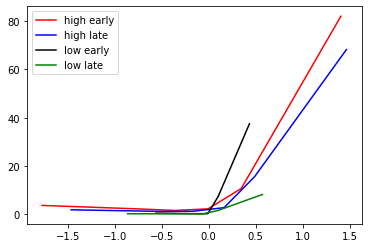

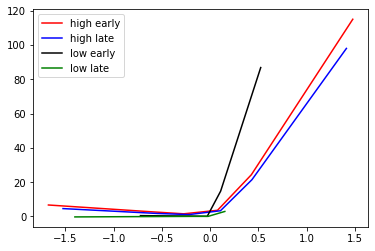

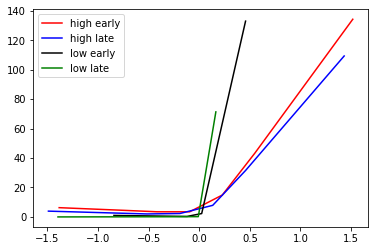

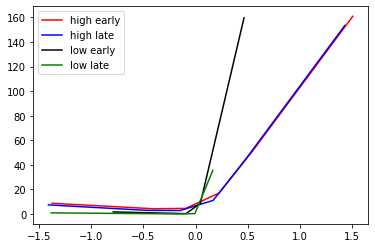

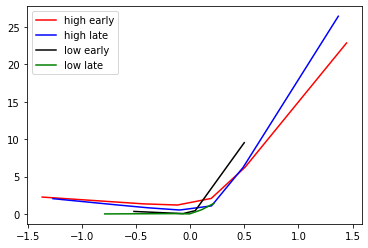

In [132]:
for cell in range(5):
    _, x_he, nonlinear_he = LN_model_multi_trials(stimuli, responses, 0.35, cell, 0, 500, sta_type='fourier')
    _, x_hl, nonlinear_hl = LN_model_multi_trials(stimuli, responses, 0.35, cell, 1400, 2000, sta_type='fourier')
    _, x_le, nonlinear_le = LN_model_multi_trials(stimuli, responses, 0.05, cell, 2000, 2500, sta_type='fourier')
    _, x_ll, nonlinear_ll = LN_model_multi_trials(stimuli, responses, 0.05, cell, 3400, 4000, sta_type='fourier')
    plt.plot(x_he, nonlinear_he, 'r', label='high early')
    plt.plot(x_hl, nonlinear_hl, 'b', label='high late')
    plt.plot(x_le, nonlinear_le, 'k', label='low early')
    plt.plot(x_ll, nonlinear_ll, 'g', label='low late')
    plt.legend()
    plt.show()

In [17]:
cfg = get_custom_cfg('kinetics_1')
device = torch.device('cuda:3')
model_func = getattr(models, cfg.Model.name)
model_kwargs = dict(cfg.Model)
model = model_func(**model_kwargs).to(device)
checkpoint = torch.load('/home/xhding/saved_model/kinetics_1/epoch_005_loss_-75.76_pearson_0.2917.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
data_kwargs = dict(cfg.Data)
train_dataset = MyDataset(stim_sec='train', **data_kwargs)
validation_data =  DataLoader(dataset=MyDataset(stim_sec='validation', stats=train_dataset.stats, **data_kwargs))

In [18]:
pearson, val_pred, val_targ  = pearsonr_eval(model, validation_data, 3, device, with_responses=True)

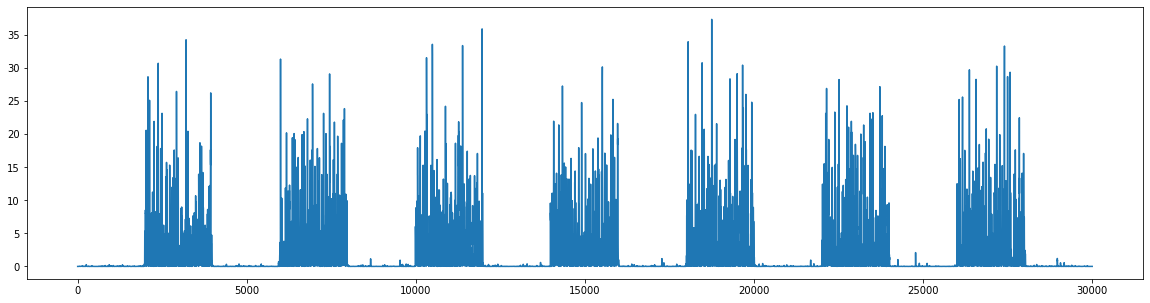

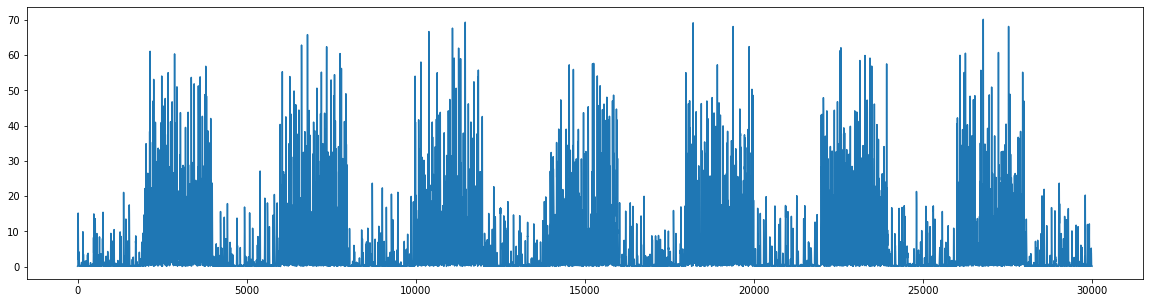

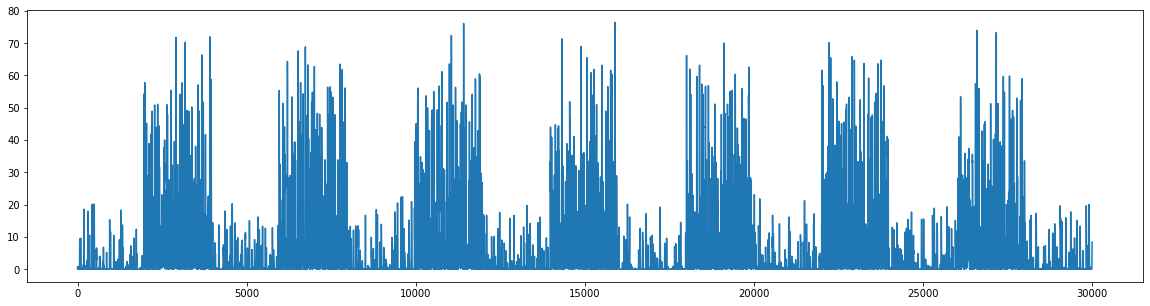

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(val_pred[:, 0])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(val_pred[:, 1])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(val_pred[:, 2])
plt.show()

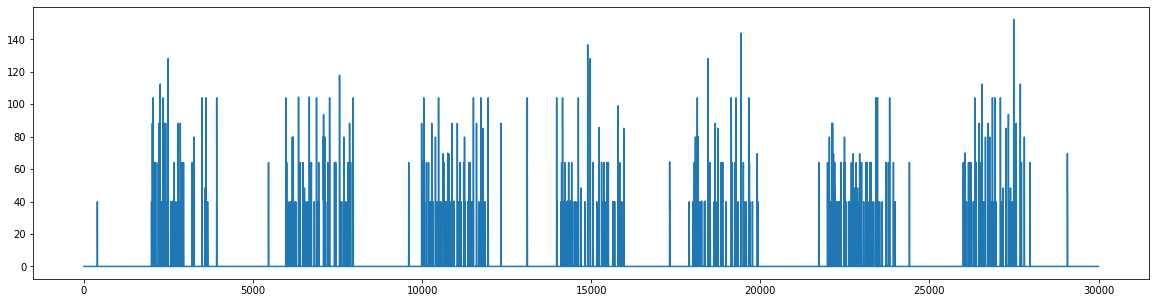

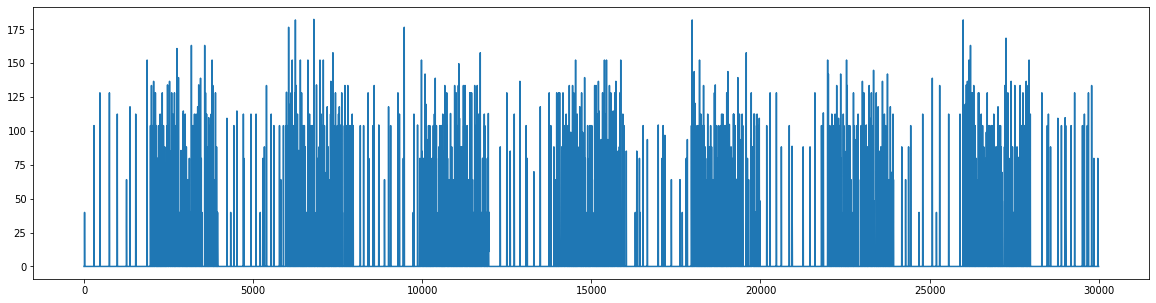

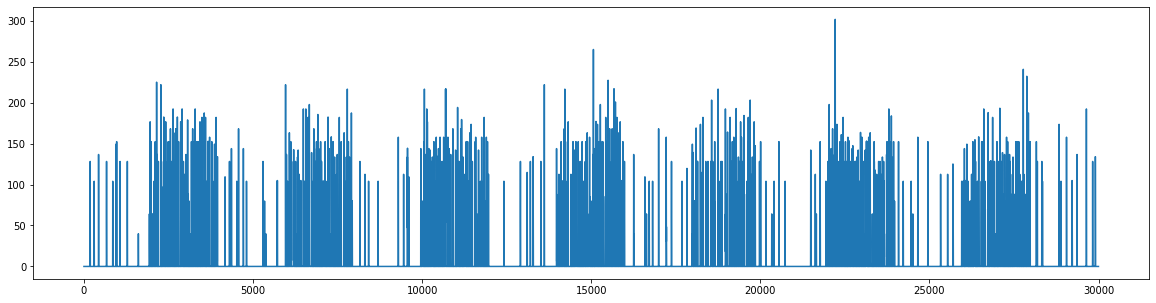

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(val_targ[:, 0])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(val_targ[:, 1])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(val_targ[:, 2])
plt.show()

In [21]:
pearson

0.29168693134751816

In [4]:
with h5py.File('/home/xhding/tem_stim/20-10-30/fullfield_whitenoise.h5', 'r') as f:
    stimulus =  np.asarray(f['test']['stimulus'][:, 25, 25])

In [10]:
2**2

4